In [8]:
import numpy as np 
import pandas as pd
import requests
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv', 
                 delimiter=',', index_col='Date')
df.head()


,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


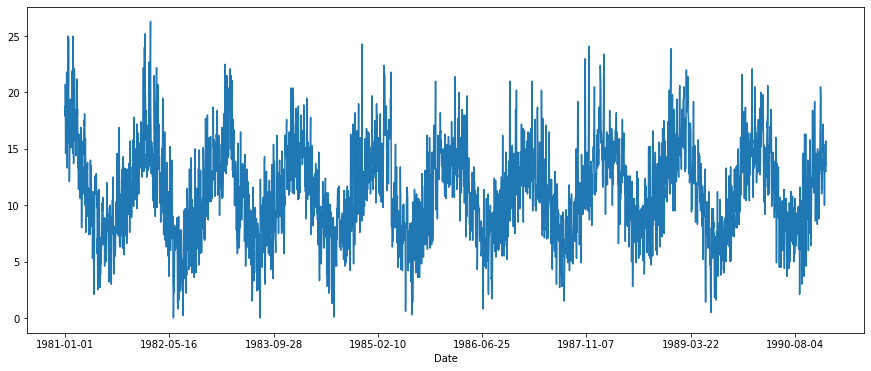

In [26]:
df['Temp'].plot(figsize=(15, 6));


In [18]:
alpha = 0.2

In [19]:
df['Temp_EWMA'] = df['Temp'].ewm(alpha=alpha, adjust=False).mean()
df.head(10)

,Temp,Temp_EWMA
Date,,
1981-01-01,20.7,20.700000
1981-01-02,17.9,20.140000
1981-01-03,18.8,19.872000
1981-01-04,14.6,18.817600
1981-01-05,15.8,18.214080
1981-01-06,15.8,17.731264
1981-01-07,15.8,17.345011
1981-01-08,17.4,17.356009
1981-01-09,21.8,18.244807


<Figure size 1080x432 with 0 Axes>

<AxesSubplot:xlabel='Date'>

<Figure size 1080x432 with 0 Axes>

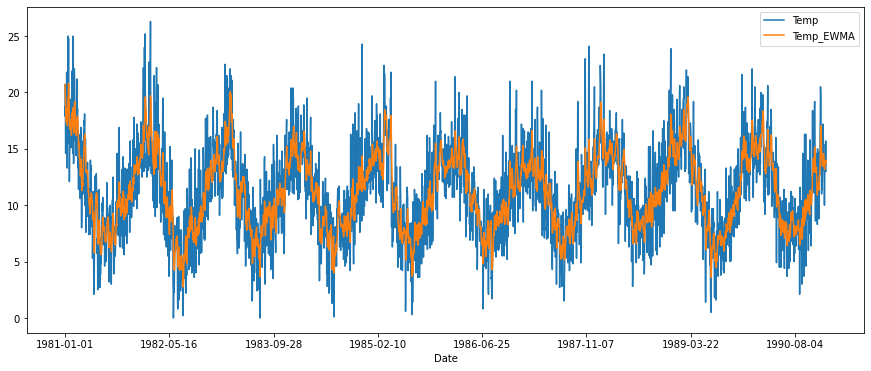

In [25]:
df[['Temp', 'Temp_EWMA']].plot(figsize=(15, 6))


#### 嘗試不用套件實現 EWMA

In [28]:
manual_ewma = []
for x in df['Temp'].to_numpy():
    if len(manual_ewma) > 0:
        xhat = x * alpha + manual_ewma[-1] * (1-alpha)
    else:
        xhat = x
    manual_ewma.append(xhat)
    
df['Temp_ManualEWMA'] = manual_ewma


<AxesSubplot:xlabel='Date'>

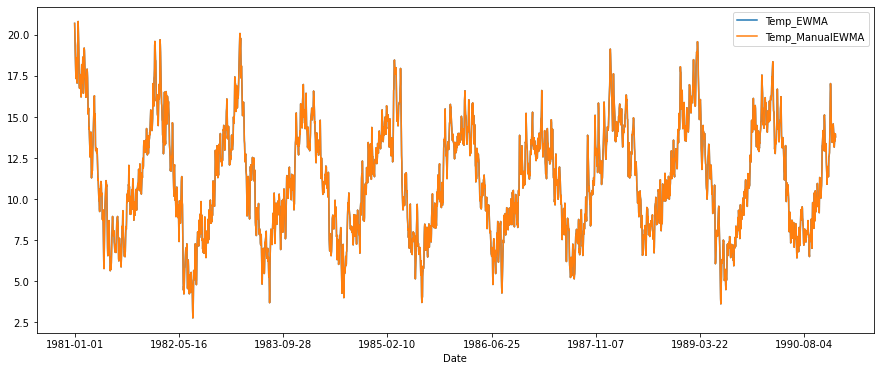

In [30]:
df[['Temp_EWMA', 'Temp_ManualEWMA']].plot(figsize=(15, 6))
